**Homework #01**

Kirill Shcherbakov

**Problem 1**

**Optimization problem example**


Find the dimensions (height $h$ and radius $r$) that will minimize the surface area of the metal to manufacture a circular cylindrical can of volume $V$ .

**Solution**

Suppose that $h$ is the height and $r$ is the radius of a given metal circular cylindrical can.
Then, its volume is:

$$
V = \pi r^2 h
$$

The surface area of the can in this case is:

$$
S = 2 \pi r^2 + 2 \pi r h
$$

Let us consider the following Lagrange functional:

$$
L(r,h) = 2 \pi r^2 + 2 \pi r h + \lambda (V - \pi r^2 h)
$$

In order to find the dimensions (height $h$ and radius $r$) that minimize the surface area of our can let's solve the following system of linear equations:

$$
\begin{cases}
\frac{\partial L}{\partial r} = 4 \pi r + 2 \pi h - 2\lambda \pi r h = 0 ,\\
\frac{\partial L}{\partial h} = 2 \pi r - \lambda \pi r^2 = 0,\\
V - \pi r^2 h = 0
\end{cases}
$$

Then solving the second equation (keeping in mind that common sense tells us that $r >0 $), we got:

$$
\lambda \pi r^2 = 2 \pi r
$$
$$
\lambda = \frac{2}{r}
$$

Then using the first equation we got:

$$
4 \pi r + 2 \pi h - 4 \pi h = 0
$$
$$
4 \pi r = 2 \pi h
$$
$$
h = 2r
$$

Now we can find our $r$ and $h$ using the equation for the volume:

$$
r = \sqrt[3]{\frac{V}{2 \pi}}
$$

and 

$$
h = 2r = 2 \sqrt[3]{\frac{V}{2 \pi}}
$$

Now we have to be sure that the results minimize our function:

$$
d^2L =  \frac{\partial^2 L}{\partial r^2} dr^2 + 2 \frac{\partial^2 L}{\partial r \partial h}dr dh + \frac{\partial^2 L}{\partial h^2} dh^2 
$$

$$
\frac{\partial^2 L}{\partial r^2} = 4 \pi - 2\lambda\pi h = -4\pi
$$

$$
\frac{\partial^2 L}{\partial r \partial h} = 2 \pi - 2\lambda \pi r = -2\pi
$$

$$
\frac{\partial^2 L}{\partial h^2} = 0
$$

Using the third equation of our system of linear equations, we can set the dependance between $dh$ and $dr$, we take the differential from the coupling equation and draw a formal solution for our problem:

$$
d(V) - d( \pi r^2 h) = 0
$$

$$
2r \pi h dr + \pi r^2 dh = 0 
$$

$$
dh = -\frac{2h}{r} dr = -4 dr
$$

Then we have the following:

$$
d^2L = -4\pi dr^2 -4\pi dr dh = -4\pi dr^2 + 16\pi dr^2 = 12\pi dr^2 > 0
$$

It proves that we got a minimum of our function.

Answer: $
r = \sqrt[3]{\frac{V}{2 \pi}}
$
and 
$
h = 2 \sqrt[3]{\frac{V}{2 \pi}}
$

**Problem 2**

**Optimally conditions**

Consider the unconstrained optimization problem to minimize the function,

$$ f(x_{1}, x_{2}) = \frac{3}{2} (x_{1}^{2} + x_{2}^{2}) + (1+a)x_{1}x_{2} - (x_{1} + x_{2}) + b, \And a,b \in R
$$
over $R^2$, where $a$ and $b$ are real-valued parameters. Find all values of $a$ and $b$ such that the problem has a unique optimal solution.

**Solution**

First, let's find derivatives:

$$\frac{\partial f}{\partial x_1} = 3x_1 + (1+a)x_2 - 1 = 0 $$

$$\frac{\partial f}{\partial x_2} = 3x_2 + (1+a)x_1 - 1 = 0 $$

And the second order derivative:

$$ d^2f = 3 dx_1^2 + (2+2a)dx_1dx_2 + 3 dx_2^2 $$

We know that in minimum $d^2f \geq 0 $, then:

$$ d^2f \geq 0 $$

$$ 9 - (1 + a)^2 \geq 0 $$

And we get:

$$ a \in [-4,2] $$

But we also have to check the first order conditions, considering the system of linear equations:

$$
\begin{cases}
\frac{\partial f}{\partial x_1} = 3x_1 + (1+a)x_2 - 1 = 0,\\
\frac{\partial f}{\partial x_2} = 3x_2 + (1+a)x_1 - 1 = 0\\
\end{cases}
$$

In matrix form this system looks as the following:

$$
\begin{bmatrix} 
3 & (1+a) \\
(1+a) & 3 
\end{bmatrix}
\begin{bmatrix} 
x_1\\
x_2
\end{bmatrix}
=
\begin{bmatrix} 
1\\
1
\end{bmatrix}
$$

The system has unique solution if the first matrix is a non-singular matrix, in other words the determinant should not equal to zero:

$$
\begin{vmatrix} 
3 & (1+a) \\
(1+a) & 3 
\end{vmatrix}
= 9 - (1 + a)^2 
= 0 
$$

And we see that in cases when $a = -4$ there is no solution and when $a = 2$ a solution is not unique. 

Answer: there is a unique solution for $b \in R, a \in (-4, 2)$

**Problem 3**

**Nelder Mead method**

Implement Nelder-Mead method for the Mishra’s Bird function
$$
f(x, y) = sin(y)e^{(1-cos(x))^2}+cos(x)e^{(1-sin(y))^2} + (x-y)^2
$$
subjected to, $(x+5)^2 + (y+5)^2 < 25$

**Solution**

***Subproblem 1, 2. To illustrate the behavior of the methods plot simplex (triangle) for every iteration. Demonstrate that the algorithm may converge to different points depending on the starting point.***

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
from scipy import optimize, spatial

# Mishra’s Bird function
# subjected to (x+5)^2+(y+5)^2 < 25
def f(x):

    func = np.sin(x[1]) * np.exp((1 - np.cos(x[0])) ** 2) + np.cos(x[0]) * np.exp((1 - np.sin(x[1])) ** 2) + (x[0] - x[1])**2
    f_const = np.where((x[0] + 5) ** 2 + (x[1] + 5) ** 2 < 25, func, np.inf)

    return f_const

****Nelder Mead method**** 

In [0]:
def take_simplex(f_x):
    
    # index sort
    f_x_sorted = sorted(f_x, key = lambda x: x[0])
    simplex = np.array([x for i, x, f in f_x_sorted])
    
    return simplex

def take_distance(f_x):

    # take pairwise simplex distance
    distance_sum = []
    simplex_d = np.array([x for i, x, f in f_x])
    distance_pairwise = spatial.distance.pdist(simplex_d).sum()
    distance_sum.append(distance_pairwise)

    return distance_pairwise

def nelder_mead(f, alpha = 1.0, beta = 0.5, gamma = 2.0, x0 = None, n = None, max_iter = 1000, tol = 1e-7):

  # initialization 
  oracles = 0 
  f_ls = []
  simplexes = []
  iterations = 0
  x = x0   

  f_x = [[i, x_i, f(x_i)] for i, x_i in enumerate(x)]   


  oracles += len(x)

  while take_distance(f_x) > tol:
    simplexes += [take_simplex(f_x)]

    if iterations >= max_iter:
      break

    iterations += 1    
            
    # sort
    f_x = sorted(f_x, key = lambda x: x[2], reverse = True)

    x_h = f_x[0][1]
    x_g = f_x[1][1]
    x_l = f_x[-1][1]
    
    f_h = f_x[0][2]
    f_g = f_x[1][2]
    f_l = f_x[-1][2]
    f_ls.append(f_l)

    # mass center
    x_c = np.mean([x for i, x, _ in f_x[1:]], axis = 0)

    # reflection
    x_r = x_c + alpha * (x_c - x_h)

    f_r = f(x_r)
    oracles += 1

    # case 1
    if f_r <= f_l:

        # extention
        x_e = x_c + gamma * (x_r - x_c)

        f_e = f(x_e)
        oracles += 1
        
        # x_h changing
        f_x[0][1:] = [x_e, f_e] if f_e < f_r else [x_r, f_r]
        continue

    # case 2
    elif f_l <= f_r < f_g:

        # x_h changing 
        f_x[0][1:] = [x_r, f_r]
        continue

    # case 3
    else:

        if f_g <= f_r < f_h:

            # x_r -> x_c
            x_s = x_c + beta * (x_r - x_c)
            f_s = f(x_s)
            oracles += 1
            
            if f_s <= f_r:

                f_x[0][1:] = [x_s, f_s]
                continue
        else:

            # x_h -> x_c
            x_s = x_c + beta * (x_h - x_c)
            f_s = f(x_s)
            oracles += 1
        
            if f_s < f_h:

                f_x[0][1:] = [x_s, f_s]
                continue
                        
        # shrinking
        for i, x, _ in f_x:

            x_i = x_l + (x - x_l) / 2.
            f_x[i][1:] = [x_i, f(x_i)]
            oracles += 1

  return oracles, iterations, f_l, simplexes


****First starting point case****

In [0]:
x0_1 = np.random.normal(loc = [-6, -2], scale = 1, size = (3,2))

In [0]:
oracles, iterations, f_l, simplexes = nelder_mead(f, x0 = x0_1, tol = 1e-9)

print("we started from", x0_1)
print("we converged to", simplexes[-1])
print("the following minimum of the function was achivied:", f_l)
print("total number of oracle calls:", oracles)
print("total number of iterations:", iterations)

we started from [[-6.94311844 -2.62436622]
 [-4.79166643 -2.5129948 ]
 [-6.30244817 -2.27823011]]
we converged to [[-3.13024681 -1.58214217]
 [-3.13024681 -1.58214217]
 [-3.13024681 -1.58214217]]
the following minimum of the function was achivied: -106.7645367492647
total number of oracle calls: 155
total number of iterations: 76


***Animation of case 1***

MovieWriter imagemagic unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


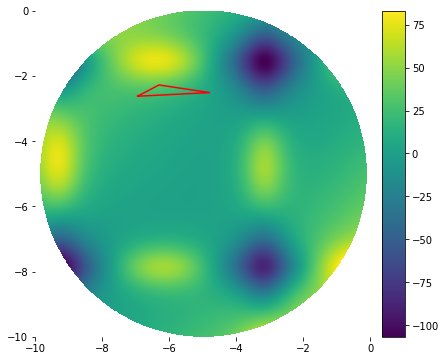

In [0]:
# plotting the animation for the first case

def triangle(z):

    x = [z[i, 0] for i in range(len(z))]
    y = [z[i, 1] for i in range(len(z))]

    x.append(x[0] * 0.99 + x[-1] * 0.01)
    y.append(y[0] * 0.99 + y[-1] * 0.01)

    return x,y
  
pltx, plty = triangle(simplexes[0])
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, label='1')
ax2 = fig.add_subplot(111, label='2', frame_on=False)
x_lin = np.linspace(-10, 0, 1000)
y_lin = np.linspace(0, -10, 1000)
z = [[f(np.array([x_lin[j], y_lin[i]])) for j in range(len(x_lin))] for i in range(len(y_lin))]
plt.xlim(-10, 0)
plt.ylim(-10, 0)
data, = ax2.plot(pltx, plty,'r')
im = ax.imshow(z)
ax.axis('off')
axins = inset_axes(ax,
                   width="7%",
                   height="100%",
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
cbar = plt.colorbar(im,cax = axins)
cbar.ax.tick_params(labelsize=10)

def animate(i):

    pltx,plty = triangle(simplexes[i])
    data.set_data(pltx, plty)


ani = animation.FuncAnimation(fig, animate, len(simplexes), interval= 400)
ani.save('nelder_animation.gif', writer ='imagemagic')

****Second starting point case****

In [0]:
x0_2 = np.random.normal(loc = [-5, -8], scale = 1, size = (3, 2))

oracles2, iterations2, f_l2, simplexes2 = nelder_mead(f, x0 = x0_2, tol = 1e-9)

print("we started from", x0_2)
print("we converged to", simplexes2[-1])
print("the following minimum of the function was achivied:", f_l2)
print("total number of oracle calls:", oracles2)
print("total number of iterations:", iterations2)

we started from [[ -4.20552764  -8.05899194]
 [ -4.7757698  -10.00945001]
 [ -4.66604517  -8.51242599]]
we converged to [[-3.17572651 -7.81984778]
 [-3.17572651 -7.81984778]
 [-3.17572651 -7.81984778]]
the following minimum of the function was achivied: -87.31088273300354
total number of oracle calls: 153
total number of iterations: 75


***Animation of case 2***

MovieWriter imagemagic unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


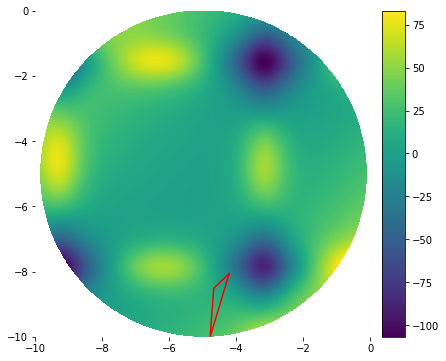

In [0]:
# plotting the animation for the second case

def triangle(z):
    
    x = [z[i, 0] for i in range(len(z))]
    y = [z[i, 1] for i in range(len(z))]
    x.append(x[0] * 0.99 + x[-1] * 0.01)
    y.append(y[0] * 0.99 + y[-1] * 0.01)
    return x,y
  
pltx, plty = triangle(simplexes2[0])
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, label='1')
ax2 = fig.add_subplot(111, label='2', frame_on=False)
x_lin = np.linspace(-10, 0, 1000)
y_lin = np.linspace(0, -10, 1000)
z = [[f(np.array([x_lin[j],y_lin[i]])) for j in range(len(x_lin))] for i in range(len(y_lin))]
plt.xlim(-10, 0)
plt.ylim(-10, 0)
data, = ax2.plot(pltx, plty,'r')
im = ax.imshow(z)
ax.axis('off')
axins = inset_axes(ax,
                   width="7%",
                   height="100%",
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
cbar = plt.colorbar(im,cax = axins)
cbar.ax.tick_params(labelsize = 10)

def animate(i):

    pltx,plty = triangle(simplexes2[i])
    data.set_data(pltx, plty)


ani = animation.FuncAnimation(fig, animate, len(simplexes2), interval= 400)
ani.save('nelder_animation2.gif', writer ='imagemagic')

***Subproblem 3. Examine the behavior of the method for various parameters α, β and γ***

***Showing that for one chosen starting point the method may converge to different points***

In [0]:
# define the parameter sets
param_sets = [
    
    # first set of parameters
    {'alpha':2,
      'beta': 0.5,
      'gamma': 2},

    # second set of paramteres
    {'alpha':1,
      'beta': 0.25,
      'gamma': 2},

    # third set of parameters
    {'alpha':1,
      'beta': 0.5,
      'gamma': 1},
    
    # fourth set of parameters
    {'alpha':1.5,
      'beta': 0.3,
      'gamma': 1.5}
]

x0 = np.random.normal(loc = [-8, -5], scale = 0.5, size = (3,2)) #(-8,-4)

for i, params in enumerate(param_sets):

    print ('Optimizer', i + 1)
    print(' Parameter values:', params)

    oracles_c, iterations_c, f_l_c, simplexes_c = nelder_mead(f, **params, x0 = x0, tol = 1e-9)

    print("we started from", x0)
    print("we converged to", simplexes_c[-1])
    print("the following minimum of the function was achivied:", f_l_c)
    print("total number of oracle calls:", oracles_c)
    print("total number of iterations:", iterations_c)
    
    print ('=========================================')

Optimizer 1
 Parameter values: {'alpha': 2, 'beta': 0.5, 'gamma': 2}
we started from [[-7.68932105 -4.84274037]
 [-7.52007692 -5.79105137]
 [-8.07345728 -5.13020332]]
we converged to [[-3.17572651 -7.81984777]
 [-3.17572651 -7.81984777]
 [-3.17572651 -7.81984777]]
the following minimum of the function was achivied: -87.3108827330036
total number of oracle calls: 192
total number of iterations: 86
Optimizer 2
 Parameter values: {'alpha': 1, 'beta': 0.25, 'gamma': 2}
we started from [[-7.68932105 -4.84274037]
 [-7.52007692 -5.79105137]
 [-8.07345728 -5.13020332]]
we converged to [[-5.3776666  -5.61790767]
 [-5.3776666  -5.61790767]
 [-5.3776666  -5.61790767]]
the following minimum of the function was achivied: 1.4870191265420762
total number of oracle calls: 162
total number of iterations: 79
Optimizer 3
 Parameter values: {'alpha': 1, 'beta': 0.5, 'gamma': 1}
we started from [[-7.68932105 -4.84274037]
 [-7.52007692 -5.79105137]
 [-8.07345728 -5.13020332]]
we converged to [[-9.19071449 -

Here we can clearly see that for one chosen starting point models with different parameters $α$, $β$ and $γ$ may converge to different points.

**Problem 4**

**Coordinate descend method**

In [0]:
def grad(x):

    grad_y = -2 * (x[0] - x[1]) + np.exp((1 - np.cos(x[0])) **2) * np.cos(x[1]) - 2 * np.cos(x[0]) * np.exp((1 - np.sin(x[1])) ** 2)*  (1 - np.sin(x[1])) * np.cos(x[1])
    grad_x = 2 * (x[0] - x[1]) - np.sin(x[0]) * np.exp((1 - np.sin(x[1])) **2) + 2 * np.sin(x[0]) * np.exp((1 - np.cos(x[0])) **2) * (1 - np.cos(x[0])) * np.sin(x[1])

    return np.array([grad_x, grad_y])

def coord_descent(x0):

    e_i = np.eye(len(x0))
    gradient = grad(x0)
    index = np.argmax(abs(gradient))
    x_i = x0 - 1/L * gradient[index] * e_i[index]

    return x_i

In [0]:
# initialization of a starting point
x0 = np.random.normal(loc = [-6, -2], scale = 0.5, size = (1, 2))
x_points = [x0[0].copy()]

# Lipschitz constant, calculated via Wolfram
L = 275

In [0]:
# implementing Coordinate Descend
x_points.append(coord_descent(x_points[-1]).copy())

# initialization of parameters
oracles_cd = 2
iterations_cd = 1
tol = 1e-4

while np.linalg.norm(x_points[-1] - x_points[-2]) > tol:
    
    oracles_cd += 2
    iterations_cd += 1
    x_points.append(coord_descent(x_points[-1]).copy())
    
print("we started from", x0)
print("we converged to", x_points[-1])
print("the following minimum of the function was achivied:", f(x_points[-1]))
print("total number of oracle calls:", oracles_cd)
print("total number of iterations:", iterations_cd)

we started from [[-5.95594137 -2.27113356]]
we converged to [-3.13024776 -1.58214227]
the following minimum of the function was achivied: -106.76453674913826
total number of oracle calls: 596
total number of iterations: 298


MovieWriter imagemagic unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


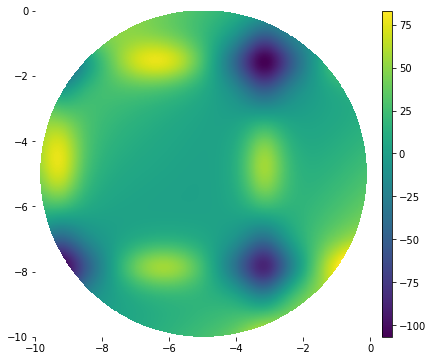

In [0]:
# animation for  Coordinate Descend

def make_steps(history, l):

    x = [history[i][0] for i in range(l + 1)]
    y = [history[i][1] for i in range(l + 1)]

    return x,y

pltx, plty = make_steps(x_points,0)
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, label = '1')
ax2 = fig.add_subplot(111, label='2', frame_on=False)
x_lin = np.linspace(-10, 0, 1000)
y_lin = np.linspace(0, -10, 1000)
z = [[f(np.array([x_lin[j],y_lin[i]])) for j in range(len(x_lin))] for i in range(len(y_lin))]
plt.xlim(-10, 0)
plt.ylim(-10, 0)
data, = ax2.plot(pltx,plty,'r')
im = ax.imshow(z)
ax.axis('off')
axins = inset_axes(ax,
                   width="3%",
                   height="100%",
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
cbar = plt.colorbar(im,cax = axins)
cbar.ax.tick_params(labelsize = 10)

def animate(i):
    pltx, plty = make_steps(x_points,i)
    data.set_data(pltx, plty)


ani = animation.FuncAnimation(fig, animate, len(x_points),interval =  400)
ani.save('coord_descent.gif', writer='imagemagic')

***Comparisonthe number of function evaluations (Oracle calls) for Nelder Mead algorithm and Coordinate descend***

In [0]:
print("Nelder Mead algorithm")
print("we started from", x0_1)
print("we converged to", simplexes[-1])
print("the following minimum of the function was achivied:", f_l)
print("total number of oracle calls:", oracles)
print("total number of iterations:", iterations)

print("-----------------------------------------")

print("Coordinate descend algorithm")
print("we started from", x0)
print("we converged to", x_points[-1])
print("the following minimum of the function was achivied:", f(x_points[-1]))
print("total number of oracle calls:", oracles_cd)
print("total number of iterations:", iterations_cd)

Nelder Mead algorithm
we started from [[-6.94311844 -2.62436622]
 [-4.79166643 -2.5129948 ]
 [-6.30244817 -2.27823011]]
we converged to [[-3.13024681 -1.58214217]
 [-3.13024681 -1.58214217]
 [-3.13024681 -1.58214217]]
the following minimum of the function was achivied: -106.7645367492647
total number of oracle calls: 155
total number of iterations: 76
-----------------------------------------
Coordinate descend algorithm
we started from [[-5.95594137 -2.27113356]]
we converged to [-3.13024776 -1.58214227]
the following minimum of the function was achivied: -106.76453674913826
total number of oracle calls: 596
total number of iterations: 298


**Conclusion**

In this particular case we clearly see that Coordinate Descent algorithm demands much more oracle calls then Nelder-Mead algorithm since at each iteration we need to evaluate function at least two times to compute the approximation of derivatives. But in other initial points we can see that Coordinate Descent algorithm converges very quickly but often to some local minimums.

Therefore, I can conclude that in this case Nelder Mead algorithm is a better choice since it has at three points at initialization of a simplex, which allows us to avoid local minimums better than Coordinate Descend algorithm and the number of oracle calls may vary depending on initial simplex and parameters $\alpha$, $\beta$, $\gamma$ as we showed it, which we can adjust.